# 1. Real Estate Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data
- 사용할 데이터는 california 집 값을 예측하는 데이터  
- 데이터는 `sklearn.datasets`의 `fetch_california_housing`를 통해 사용

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [3]:
data, target = housing["data"], housing["target"]

print(data)
print(target)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


### 1.2 EDA

In [4]:
pd.DataFrame(data, columns=housing["feature_names"]).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
pd.Series(target).describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

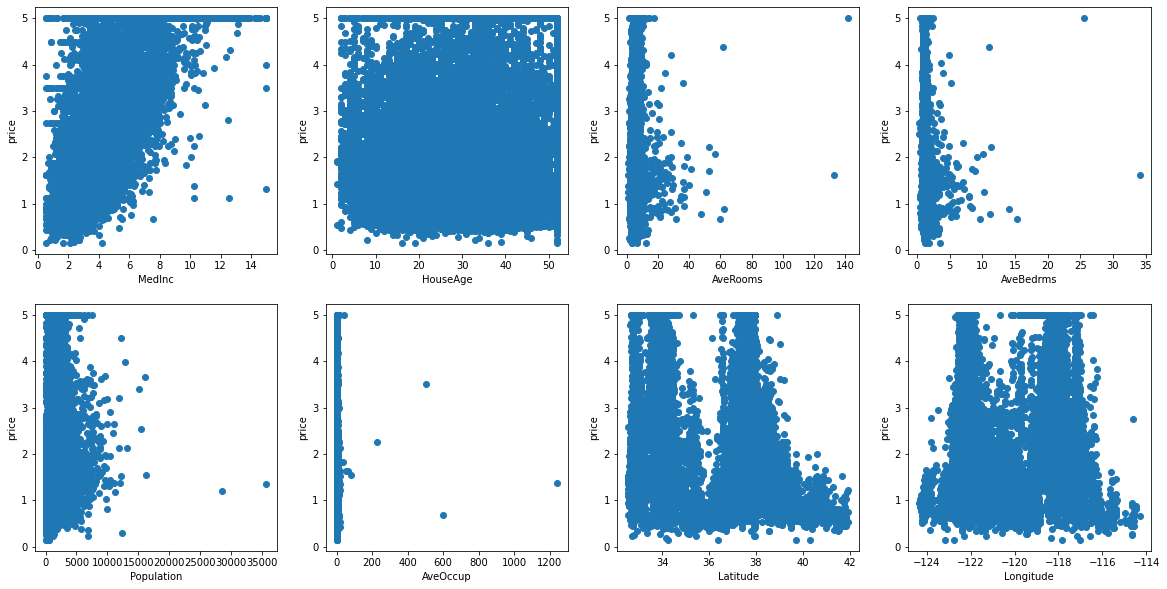

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature_name in enumerate(housing["feature_names"]):
    ax = axes[i // 4, i % 4]
    ax.scatter(data[:, i], target)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("price")

### 1.3 Split

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021)

# 2. XGBoost

In [8]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()

### 2.1 Learning

In [9]:
xgb_reg.fit(train_data, train_target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### 2.2 Predict

In [10]:
xgb_train_pred = xgb_reg.predict(train_data)
xgb_test_pred = xgb_reg.predict(test_data)

Text(0, 0.5, 'target')

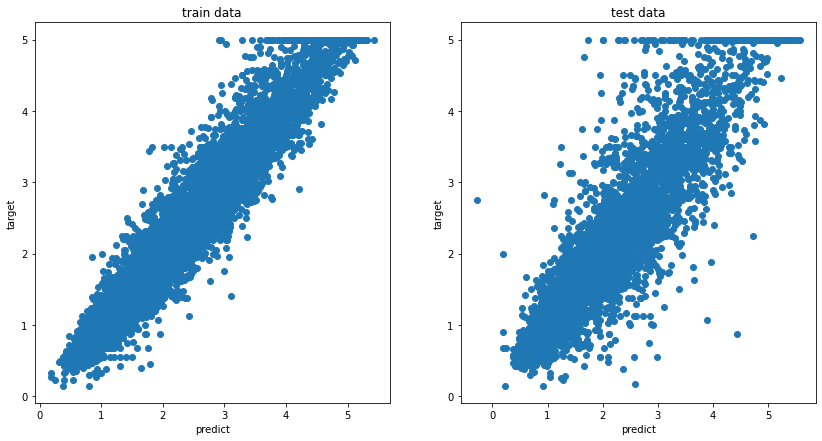

In [11]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(xgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(xgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 2.3 Evalution

In [12]:
from sklearn.metrics import mean_squared_error

xgb_train_mse = mean_squared_error(train_target, xgb_train_pred)
xgb_test_mse = mean_squared_error(test_target, xgb_test_pred)

In [13]:
print(f"XGBoost Train MSE is {xgb_train_mse:.4f}")
print(f"XGBoost Test MSE is {xgb_test_mse:.4f}")

XGBoost Train MSE is 0.0697
XGBoost Test MSE is 0.2209


# 3. LightGBM

In [14]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()

### 3.1 Learning

In [15]:
lgb_reg.fit(train_data, train_target)

LGBMRegressor()

### 3.2 Predict

In [16]:
lgb_train_pred = lgb_reg.predict(train_data)
lgb_test_pred = lgb_reg.predict(test_data)

Text(0, 0.5, 'target')

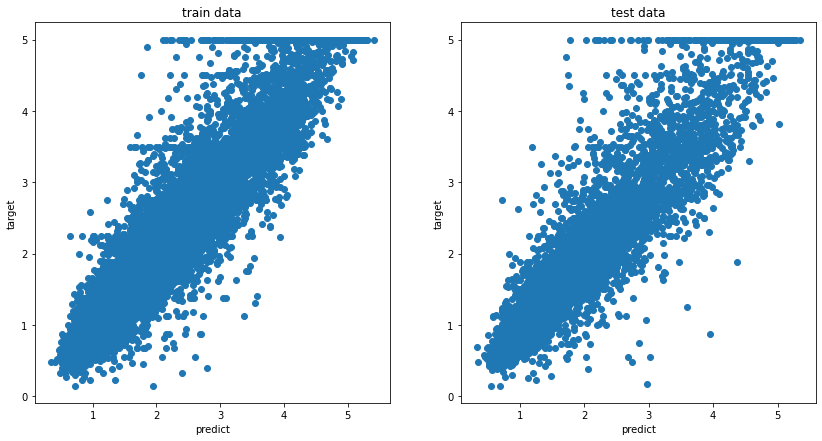

In [17]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(lgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(lgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 3.3 Evalution

In [18]:
lgb_train_mse = mean_squared_error(train_target, lgb_train_pred)
lgb_test_mse = mean_squared_error(test_target, lgb_test_pred)

print(f"Light Boost Train MSE is {lgb_train_mse:.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse:.4f}")

Light Boost Train MSE is 0.1543
Light Boost Test MSE is 0.2098


# 4. CatBoost

In [19]:
import catboost as cb

cb_reg = cb.CatBoostRegressor()

### 4.1 Learning

In [20]:
cb_reg.fit(train_data, train_target, verbose=False)

### 4.2 Predict

In [21]:
cb_train_pred = cb_reg.predict(train_data)
cb_test_pred = cb_reg.predict(test_data)

Text(0, 0.5, 'target')

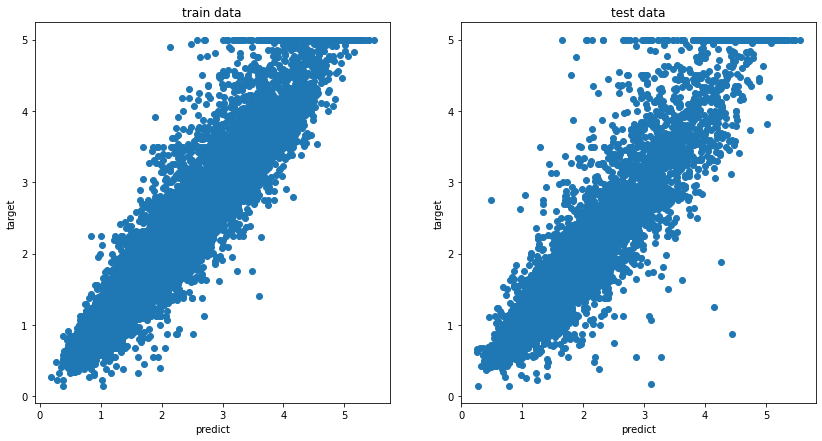

In [22]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(cb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(cb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 4.3 Evalution

In [23]:
cb_train_mse = mean_squared_error(train_target, cb_train_pred)
cb_test_mse = mean_squared_error(test_target, cb_test_pred)

print(f"Cat Boost Train MSE is {cb_train_mse:.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse:.4f}")

Cat Boost Train MSE is 0.1163
Cat Boost Test MSE is 0.1938


# 5. Summary

In [24]:
print(f"XGBoost Test MSE is {xgb_test_mse:.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse:.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse:.4f}")

XGBoost Test MSE is 0.2209
Light Boost Test MSE is 0.2098
Cat Boost Test MSE is 0.1938
